In [1]:
ls

Checking_for_right_len_in_balance.ipynb
Junk - experimentation .ipynb
Junk - experimentation 2.ipynb
Junk - experimentation 3 - features & balance.ipynb
balance junk v1.ipynb
current_errors_TopMcMr_20181006.png
mannville_demo_data/
predictionclasses junk v1.ipynb
test junk.ipynb
trainclasses junk v1.ipynb
trainclasses junk v2.ipynb


In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
cd ..

/Users/justingosses/Code/predictatops


In [4]:
ls


AAPG_Abstract_2019ACE.md  README_0.rst              requirements.txt
AUTHORS.rst               __pycache__/              requirements_dev.txt
CONTRIBUTING.rst          data/                     results/
HISTORY.rst               demo/                     setup.cfg
LICENSE                   docs/                     setup.py
MANIFEST.in               environment.yml           tests/
Makefile                  predictatops/             tox.ini
README.md                 predictatops.egg-info/


In [5]:
cd predictatops/

/Users/justingosses/Code/predictatops/predictatops


In [6]:
import trainclasses 

In [7]:
import datetime
print(datetime.datetime.now())

2019-05-11 21:41:09.375598


# NOW MOVING TO predictionclasses.py file!

---------------

In [8]:
from predictionclasses import *

In [9]:
import predictionclasses 
from configurationplusfiles_runner import input_data_inst, config, output_data_inst
from main import getJobLibPickleResults

head of picks df =      SitID  HorID      Pick  Quality
0  102496   1000       321        1
1  102496   2000                 -1
2  102496   3000                 -1
3  102496   4000                 -1
4  102496   5000       438        2
making base folder for results in: ../results
base_path directory already exists, ../results  so not creating it again. This may or may not be what you intended, so just flagging it.
directory  checkData  already exists so not making it again in make_all_directories function of configurationplusfiles.py
directory  load  already exists so not making it again in make_all_directories function of configurationplusfiles.py
directory  split  already exists so not making it again in make_all_directories function of configurationplusfiles.py
directory  wellKNN  already exists so not making it again in make_all_directories function of configurationplusfiles.py
directory  features  already exists so not making it again in make_all_directories function of configura

In [10]:
################## Load model & ML class instance from trainclasses step #############

# model = getJobLibPickleResults(output_data_inst,output_data_inst.path_trainclasses,"trainclasses_model.pkl")
# ML1 = getJobLibPickleResults(output_data_inst,output_data_inst.path_trainclasses,"trainclasses_ML1_instance.pkl")

model,ML1 =loadMLinstanceAndModel(output_data_inst)

In [11]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=nan, n_estimators=100,
       n_gpus=0, n_jobs=8, nthread=None, num_class=5,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [12]:
dir(ML1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'check_test_df_same_size',
 'check_train_df_same_size',
 'dropCol',
 'dropNeighbors_ObjCol',
 'h5_to_load',
 'init_XGBoost_withSettings',
 'load_data_for_ml',
 'machine_learning_dir',
 'preSplitpreBal',
 'test_X',
 'test_index',
 'test_y',
 'train_X',
 'train_index',
 'train_y']

In [13]:
################## Class Prediction Results for training dataframe for X #############

##### Creating a class_accuracy instance with the already established ML1 variable for an isntance of the ML_obj_class
ac = class_accuracy(ML1)



In [14]:
################## First with training data #############

#### Running the accuracy calculation using the model trained on training data against training data. 
#### Testing how well the model predicts the class of each point, with class being categorized distance from actual pick.
accuracy_train = ac.run_all(model,ac.train_X,ac.train_y,'TopTarget_Pick_pred','class_DistFrPick_TopTarget')

print("accuracy of training dataset",accuracy_train)



/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy of training dataset 0.7568492694556546


In [15]:
################## Then with test data ###############

#### Running the accuracy calculation using the model trained on training data against TEST data. 
#### Testing how well the model predicts the class of each point, with class being categorized distance from actual pick.
accuracy_test = ac.run_all(model,ac.test_X,ac.test_y,'TopTarget_Pick_pred','class_DistFrPick_TopTarget')

print("accuracy of test dataset",accuracy_test)

/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy of test dataset 0.8937265559213045


In [16]:
####################################### THIS IS TEST FOR ACCURACY OVER ALL ROWS, WHICH WE REALLY DON"T CARE ABOUT ##########
############ WE CARE ABOUT THE PICK ############################

# New class for functions that take in point by point distance class prediction and use rolling window and other methods to pick which point should be the top in question
# Make a few different columns classifiers that get the rolling mean of pick classifiers within different windows.
# This will help compare a class prediction of 95 in one part of the well to a class prediction of 95 in a nother part of the well. The assumption being the right prediction will have not just one 100 or 95 prediction but several in close proximity where as the false predictions are more likely to be by themselves:

#     Median
#     Rolling mean 6
#     Rolling mean 12
#     Rolling Mean 20
#     Sums of rolling all means


concatClass = InputDistClassPrediction_to_BestDepthForTop(output_data_inst)

concatClass.load_MLobj(ML1)

concatClass.help()

prediction_distClass_trainingData_ndarray = concatClass.predict_from_model(model,ML1.train_X)

concatClass1 = concatClass.concat_modelResultsNDArray_w_indexValues(concatClass.result_df_dist_class_prediction,"train",config.pick_class_str)


loaded model into object instance
 eventually there will some sort of help printed here to explain this function more and how it is envisioned you wil run it. In other words, step 1, step 2, etc.
ran predict_from_model() which runs inside self.result_df_dist_class_prediction = model.predict(df_X_toPredict) access the results by appending .result_df_dist_class_prediction to the class instance
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
##### NEED TO PUT THIS LIST IN CONFIG ########## !!!!!!!
cols_to_keep_list = ['DEPT',"NN1_TopHelper_DEPTH","NN1_thickness","topTarget_Depth_predBy_NN1thick","DistFrom_NN1ThickPredTopDepth_toRowDept"]

concatClass2 = concatClass.concat_step2(ML1,"train",cols_to_keep_list)

#####
DEPTH_col_in_featureCreation = config.DEPTH_col_in_featureCreation
pick_class_str = config.pick_class_str
UWI = config.UWI
curve_windows_for_rolling_features = config.curve_windows_for_rolling_features
label_intergers = list(config.zonesAroundTops.keys())

distClassDF_wRollingCols_training = concatClass.calc_pred_vs_real_top_dif(concatClass.df_results_trainOrtest_wIndex,DEPTH_col_in_featureCreation,pick_class_str,UWI,curve_windows_for_rolling_features,label_intergers)


print("distClassDF_wRollingCols_training.head() = ",distClassDF_wRollingCols_training.head())

in concat_step2, type of df_results_trainOrtest_wIndex= <class 'pandas.core.frame.DataFrame'>
type(idx) <class 'pandas.core.frame.DataFrame'>
distClassDF_wRollingCols_training.head() =    class_DistFrPick_TopTarget TopTarget_Pick_pred class_DistFrPick_TopTarget                  UWI trainOrTest  TopTarget_DEPTH     DEPT  NN1_TopHelper_DEPTH  NN1_thickness  topTarget_Depth_predBy_NN1thick  DistFrom_NN1ThickPredTopDepth_toRowDept  TopTarget_Pick_pred_classRollMean5  TopTarget_Pick_pred_classRollMean7  TopTarget_Pick_pred_classRollMean11  TopTarget_Pick_pred_classRollMean21  TopTarget_Pick_predclassRollMeanSum  TopTarget_Pick_pred_DEPT_pred  TopTarget_Pick_pred_classRollMeanSum
0                          0                   0                          0  00-10-32-080-20W4-0       train           377.95  149.602                414.0           25.0                           359.66                                  210.058                                 0.0                                 0.0 

In [18]:
distClassDF_wRollingCols_training.tail()

,class_DistFrPick_TopTarget,TopTarget_Pick_pred,class_DistFrPick_TopTarget,UWI,trainOrTest,TopTarget_DEPTH,DEPT,NN1_TopHelper_DEPTH,NN1_thickness,topTarget_Depth_predBy_NN1thick,DistFrom_NN1ThickPredTopDepth_toRowDept,TopTarget_Pick_pred_classRollMean5,TopTarget_Pick_pred_classRollMean7,TopTarget_Pick_pred_classRollMean11,TopTarget_Pick_pred_classRollMean21,TopTarget_Pick_predclassRollMeanSum,TopTarget_Pick_pred_DEPT_pred,TopTarget_Pick_pred_classRollMeanSum
225238,95,100,95,00-10-35-081-15W4-0,train,321.0,320.75,323.5,23.0,325.0,4.25,97.0,91.428571,0.0,0.0,288.428571,321.0,497.424242
225239,95,100,95,00-10-35-081-15W4-0,train,321.0,321.25,323.5,23.0,325.0,3.75,98.0,97.142857,0.0,0.0,295.142857,321.0,497.424242
225240,95,100,95,00-10-35-081-15W4-0,train,321.0,320.50,323.5,23.0,325.0,4.50,0.0,0.000000,0.0,0.0,100.000000,321.0,497.424242
225241,95,100,95,00-10-35-081-15W4-0,train,321.0,320.75,323.5,23.0,325.0,4.25,0.0,0.000000,0.0,0.0,100.000000,321.0,497.424242
225242,95,100,95,00-10-35-081-15W4-0,train,321.0,321.25,323.5,23.0,325.0,3.75,0.0,0.000000,0.0,0.0,100.000000,321.0,497.424242


In [19]:
####### or run the full thing at once
#  distClassDF_wRollingCols_training2 = concatClass.run_all(ML1,model,"train",vs,cols_to_keep_list,concatClass.df_results_trainOrtest_wIndex,vs.depth_str,vs.pick_class_str,vs.UWI_str,vs.rollingWindows,vs.distClassIntegersArray)

#print("distClassDF_wRollingCols_training2.head()",distClassDF_wRollingCols_training2.head())


In [20]:
################ Now lets run test version   ################

concatClass_test = InputDistClassPrediction_to_BestDepthForTop(output_data_inst)


#####
DEPTH_col_in_featureCreation = config.DEPTH_col_in_featureCreation
pick_class_str = config.pick_class_str
UWI = config.UWI
curve_windows_for_rolling_features = config.curve_windows_for_rolling_features
label_intergers = list(config.zonesAroundTops.keys())



#### Doing it the 'all at once' way this time.
distClassDF_wRollingCols_testData = concatClass_test.run_all(ML1,model,"test",cols_to_keep_list,DEPTH_col_in_featureCreation,pick_class_str,UWI,curve_windows_for_rolling_features,label_intergers)

print("distClassDF_wRollingCols_testData.head()",distClassDF_wRollingCols_testData.head())


loaded model into object instance


/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ran predict_from_model() which runs inside self.result_df_dist_class_prediction = model.predict(df_X_toPredict) access the results by appending .result_df_dist_class_prediction to the class instance
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
in concat_step2, type of df_results_trainOrtest_wIndex= <class 'pandas.core.frame.DataFrame'>
type of dist_class_pred_df <class 'pandas.core.frame.DataFrame'>
type of self.df_results_trainOrtest_wIndex <class 'pandas.core.frame.DataFrame'>
type(idx) <class 'pandas.core.frame.DataFrame'>
distClassDF_wRollingCols_testData.head()   class_DistFrPick_TopTarget TopTarget_Pick_pred class_DistFrPick_TopTarget                  UWI trainOrTest  TopTarget_DEPTH    DEPT  NN1_TopHelper_DEPTH  NN1_thickness  topTarget_Depth_predBy_NN1thick  DistFrom_NN1ThickPredTopDepth_toRowDept  TopTarget_Pick_pred_classRollMean5  TopTarget_Pick_pred_classRollMean7  TopTarget_Pick_pred_classRollMean11  TopTarget_Pick_pred_classRollMean21  TopTarget_Pick_predclassRollMeanS

In [21]:
distClassDF_wRollingCols_testData[200:800]

,class_DistFrPick_TopTarget,TopTarget_Pick_pred,class_DistFrPick_TopTarget,UWI,trainOrTest,TopTarget_DEPTH,DEPT,NN1_TopHelper_DEPTH,NN1_thickness,topTarget_Depth_predBy_NN1thick,DistFrom_NN1ThickPredTopDepth_toRowDept,TopTarget_Pick_pred_classRollMean5,TopTarget_Pick_pred_classRollMean7,TopTarget_Pick_pred_classRollMean11,TopTarget_Pick_pred_classRollMean21,TopTarget_Pick_predclassRollMeanSum,TopTarget_Pick_pred_DEPT_pred,TopTarget_Pick_pred_classRollMeanSum
200,0,0,0,00-05-29-078-19W4-0,test,374.0,240.00,381.3,10.66,380.84,140.84,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987
201,0,0,0,00-05-29-078-19W4-0,test,374.0,240.25,381.3,10.66,380.84,140.59,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987
202,0,0,0,00-05-29-078-19W4-0,test,374.0,240.50,381.3,10.66,380.84,140.34,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987
203,0,0,0,00-05-29-078-19W4-0,test,374.0,240.75,381.3,10.66,380.84,140.09,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987
204,0,0,0,00-05-29-078-19W4-0,test,374.0,241.00,381.3,10.66,380.84,139.84,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987
205,0,0,0,00-05-29-078-19W4-0,test,374.0,241.25,381.3,10.66,380.84,139.59,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987
206,0,0,0,00-05-29-078-19W4-0,test,374.0,241.50,381.3,10.66,380.84,139.34,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987
207,0,0,0,00-05-29-078-19W4-0,test,374.0,241.75,381.3,10.66,380.84,139.09,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987
208,0,0,0,00-05-29-078-19W4-0,test,374.0,242.00,381.3,10.66,380.84,138.84,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987
209,0,0,0,00-05-29-078-19W4-0,test,374.0,242.25,381.3,10.66,380.84,138.59,0.0,0.000000,0.000000,0.000000,0.000000,368.5,485.012987


In [22]:
exploration_df_train = distClassDF_wRollingCols_training[distClassDF_wRollingCols_training['UWI'] == '00-11-12-087-22W4-0']

In [23]:
exploration_df_train [0:1200]

,class_DistFrPick_TopTarget,TopTarget_Pick_pred,class_DistFrPick_TopTarget,UWI,trainOrTest,TopTarget_DEPTH,DEPT,NN1_TopHelper_DEPTH,NN1_thickness,topTarget_Depth_predBy_NN1thick,DistFrom_NN1ThickPredTopDepth_toRowDept,TopTarget_Pick_pred_classRollMean5,TopTarget_Pick_pred_classRollMean7,TopTarget_Pick_pred_classRollMean11,TopTarget_Pick_pred_classRollMean21,TopTarget_Pick_predclassRollMeanSum,TopTarget_Pick_pred_DEPT_pred,TopTarget_Pick_pred_classRollMeanSum
213198,0,0,0,00-11-12-087-22W4-0,train,326.0,146.50,340.77,2.44,333.56,187.06,38.0,40.714286,60.454545,76.904762,216.073593,326.0,495.493506
213199,0,0,0,00-11-12-087-22W4-0,train,326.0,149.00,340.77,2.44,333.56,184.56,38.0,40.714286,51.818182,72.380952,202.913420,326.0,495.493506
213200,0,0,0,00-11-12-087-22W4-0,train,326.0,151.50,340.77,2.44,333.56,182.06,38.0,40.714286,43.181818,67.857143,189.753247,326.0,495.493506
213201,0,0,0,00-11-12-087-22W4-0,train,326.0,154.00,340.77,2.44,333.56,179.56,19.0,40.714286,43.181818,63.333333,166.229437,326.0,495.493506
213202,0,0,0,00-11-12-087-22W4-0,train,326.0,156.50,340.77,2.44,333.56,177.06,0.0,27.142857,43.181818,58.809524,129.134199,326.0,495.493506
213203,0,0,0,00-11-12-087-22W4-0,train,326.0,159.00,340.77,2.44,333.56,174.56,0.0,13.571429,43.181818,54.285714,111.038961,326.0,495.493506
213204,0,0,0,00-11-12-087-22W4-0,train,326.0,161.50,340.77,2.44,333.56,172.06,0.0,0.000000,34.545455,49.761905,84.307359,326.0,495.493506
213205,0,0,0,00-11-12-087-22W4-0,train,326.0,164.00,340.77,2.44,333.56,169.56,0.0,0.000000,25.909091,45.238095,71.147186,326.0,495.493506
213206,0,0,0,00-11-12-087-22W4-0,train,326.0,166.50,340.77,2.44,333.56,167.06,0.0,0.000000,17.272727,45.238095,62.510823,326.0,495.493506
213207,0,0,0,00-11-12-087-22W4-0,train,326.0,169.00,340.77,2.44,333.56,164.56,0.0,0.000000,8.636364,45.238095,53.874459,326.0,495.493506


In [24]:
exploration_df_train2 = distClassDF_wRollingCols_training[distClassDF_wRollingCols_training['UWI'] == '00-10-35-081-15W4-0']

In [25]:
exploration_df_train2 [0:1200]

,class_DistFrPick_TopTarget,TopTarget_Pick_pred,class_DistFrPick_TopTarget,UWI,trainOrTest,TopTarget_DEPTH,DEPT,NN1_TopHelper_DEPTH,NN1_thickness,topTarget_Depth_predBy_NN1thick,DistFrom_NN1ThickPredTopDepth_toRowDept,TopTarget_Pick_pred_classRollMean5,TopTarget_Pick_pred_classRollMean7,TopTarget_Pick_pred_classRollMean11,TopTarget_Pick_pred_classRollMean21,TopTarget_Pick_predclassRollMeanSum,TopTarget_Pick_pred_DEPT_pred,TopTarget_Pick_pred_classRollMeanSum
225039,0,0,0,00-10-35-081-15W4-0,train,321.0,141.75,323.5,23.0,325.0,183.25,38.0,40.714286,43.181818,45.238095,167.134199,321.0,497.424242
225040,0,0,0,00-10-35-081-15W4-0,train,321.0,144.25,323.5,23.0,325.0,180.75,38.0,40.714286,43.181818,45.238095,167.134199,321.0,497.424242
225041,0,0,0,00-10-35-081-15W4-0,train,321.0,146.75,323.5,23.0,325.0,178.25,38.0,40.714286,43.181818,45.238095,167.134199,321.0,497.424242
225042,0,0,0,00-10-35-081-15W4-0,train,321.0,149.25,323.5,23.0,325.0,175.75,19.0,40.714286,43.181818,45.238095,148.134199,321.0,497.424242
225043,0,0,0,00-10-35-081-15W4-0,train,321.0,151.75,323.5,23.0,325.0,173.25,0.0,27.142857,43.181818,45.238095,115.562771,321.0,497.424242
225044,0,0,0,00-10-35-081-15W4-0,train,321.0,154.25,323.5,23.0,325.0,170.75,0.0,13.571429,43.181818,45.238095,101.991342,321.0,497.424242
225045,0,0,0,00-10-35-081-15W4-0,train,321.0,156.75,323.5,23.0,325.0,168.25,0.0,0.000000,34.545455,45.238095,79.783550,321.0,497.424242
225046,0,0,0,00-10-35-081-15W4-0,train,321.0,159.25,323.5,23.0,325.0,165.75,0.0,0.000000,25.909091,45.238095,71.147186,321.0,497.424242
225047,0,0,0,00-10-35-081-15W4-0,train,321.0,161.75,323.5,23.0,325.0,163.25,0.0,0.000000,17.272727,45.238095,62.510823,321.0,497.424242
225048,0,0,0,00-10-35-081-15W4-0,train,321.0,164.25,323.5,23.0,325.0,160.75,0.0,0.000000,8.636364,45.238095,53.874459,321.0,497.424242


In [26]:
##################### The next part will attempt to go from classifiers of  ##################### 
#####################  (at, near, or far away from the pick in each well) to a single depth prediction for the pick in each well ###################### 
#####################  Class for calculating accuracy of single pick prediction in each well vs. #####################  
######################  known pick based on rolling average & median ranking of depths with distance class #####################  
#####################  predictions of being close to pick. #####################  

vs = {"depth_str":config.DEPTH_col_in_featureCreation,"pick_class_str":config.pick_class_str,"UWI_str" :config.UWI,"rollingWindows":config.curve_windows_for_rolling_features,"distClassIntegersArray" :list(config.zonesAroundTops.keys())}
print("vs",vs)
print("gap")
print("vs",vs["depth_str"])
### Start accuracy_singleTopPerWellPrediction_fromRollingRules() class for training data ####

rollToWell = accuracy_singleTopPerWellPrediction_fromRollingRules(ML1,vs,distClassDF_wRollingCols_training)


vs {'depth_str': 'DEPT', 'pick_class_str': 'TopTarget_Pick_pred', 'UWI_str': 'UWI', 'rollingWindows': [5, 7, 11, 21], 'distClassIntegersArray': ['100', '95', '60', '70', '0']}
gap
vs DEPT


hit yes in optionallyExcludeWellsWithoutStrongPredictions()
1
2
4
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'str'>
<class 'str'>
len(df_calc_pred_Top_Pick_pred_DEPT_pred 1275
r2 of training dataset in terms of pick depths =  0.8514489387695406
mean_absolute_error_ of training dataset in terms of pick depths =  9.4188007843137


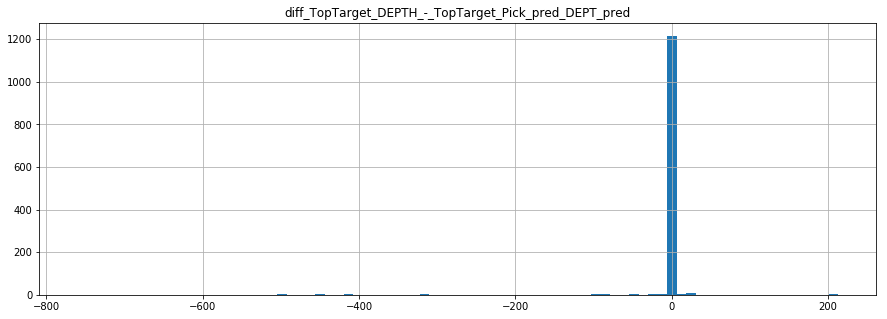

In [27]:
r2,mean_absolute_error_,df_calc_pred_Top_Pick_pred_DEPT_pred = rollToWell.run_all('TopTarget_Pick_pred_DEPT_pred','TopTarget_DEPTH')

print("len(df_calc_pred_Top_Pick_pred_DEPT_pred",len(df_calc_pred_Top_Pick_pred_DEPT_pred))
print("r2 of training dataset in terms of pick depths = ",r2)
print("mean_absolute_error_ of training dataset in terms of pick depths = ",mean_absolute_error_)

#print("len(train_list)",len(train_list))

In [28]:
rollToWell.precentWellsKept

0.99609375

In [29]:
len(rollToWell.UWIsSetSubsetKept)

1275

In [30]:
len(rollToWell.fullUWIsSet)

1280

hit pass in optionallyExcludeWellsWithoutStrongPredictions()
1
2
4
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'str'>
<class 'str'>


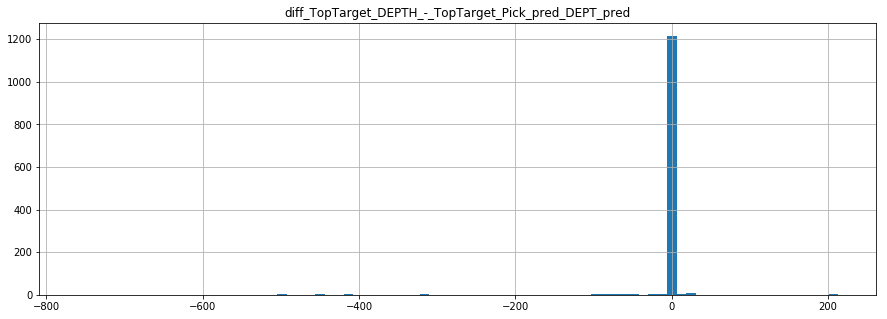

In [31]:
rollToWell2 = accuracy_singleTopPerWellPrediction_fromRollingRules(ML1,vs,distClassDF_wRollingCols_training)
r22,mean_absolute_error_2,df_calc_pred_Top_Pick_pred_DEPT_pred2 = rollToWell2.run_all('TopTarget_Pick_pred_DEPT_pred','TopTarget_DEPTH',keepAllWells="yes",dropIfOnlyClasses=[0])

In [32]:
r22

0.8499946257023072

In [33]:
mean_absolute_error_2

9.743972656249975

In [34]:
df_calc_pred_Top_Pick_pred_DEPT_pred2[0:100]

,UWI,TopTarget_Pick_pred_DEPT_pred,diff_TopTarget_DEPTH_-_TopTarget_Pick_pred_DEPT_pred,TopTarget_DEPTH
0,00-01-01-073-05W5-0,607.250,-0.250,607.00
1,00-01-03-085-15W4-0,241.001,1.999,243.00
2,00-01-05-085-15W4-0,253.250,-0.250,253.00
3,00-01-08-080-21W4-0,411.000,0.000,411.00
4,00-01-09-080-13W4-0,440.500,0.500,441.00
5,00-01-11-082-23W4-0,429.000,0.000,429.00
6,00-01-21-084-17W4-0,263.601,-0.601,263.00
7,00-01-24-075-24W4-0,602.000,0.000,602.00
8,00-01-25-083-02W4-0,220.000,0.500,220.50
9,00-01-26-068-08W4-0,435.000,0.000,435.00


In [35]:
len(rollToWell2.fullUWIsSet)


1280

In [36]:
len(rollToWell2.UWIsSetSubsetKept)

1280

In [37]:

bad_wells = (list(set(rollToWell2.fullUWIsSet) - set(rollToWell.UWIsSetSubsetKept)))

In [38]:
bad_wells

['AA-10-26-091-16W4-0',
 '00-10-17-084-25W4-0',
 'AA-10-11-094-16W4-0',
 'AA-10-29-091-15W4-0',
 'AA-03-32-092-09W4-0']

In [39]:
'00-05-29-078-19W4-0'.isin[bad_wells]

AttributeError: 'str' object has no attribute 'isin'

In [ ]:
'00-10-35-081-15W4-0' in bad_wells

hit pass in optionallyExcludeWellsWithoutStrongPredictions()
1
2
4
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'str'>
<class 'str'>


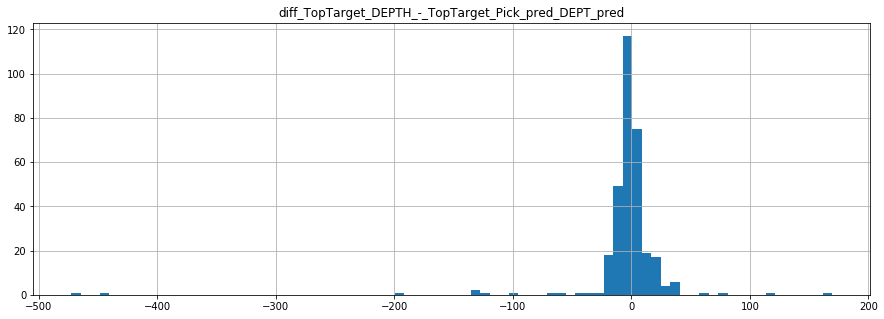

In [42]:
rollToWell_test = accuracy_singleTopPerWellPrediction_fromRollingRules(ML1,vs,distClassDF_wRollingCols_testData)
r2_test,mean_absolute_error_test,df_calc_pred_Top_Pick_pred_DEPT_pred2 = rollToWell_test.run_all('TopTarget_Pick_pred_DEPT_pred','TopTarget_DEPTH',keepAllWells="yes",dropIfOnlyClasses=[0])

In [43]:
r2_test

0.9264621436102126

In [44]:
mean_absolute_error_test

14.185785046728972

hit yes in optionallyExcludeWellsWithoutStrongPredictions()
1
2
4
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'str'>
<class 'str'>


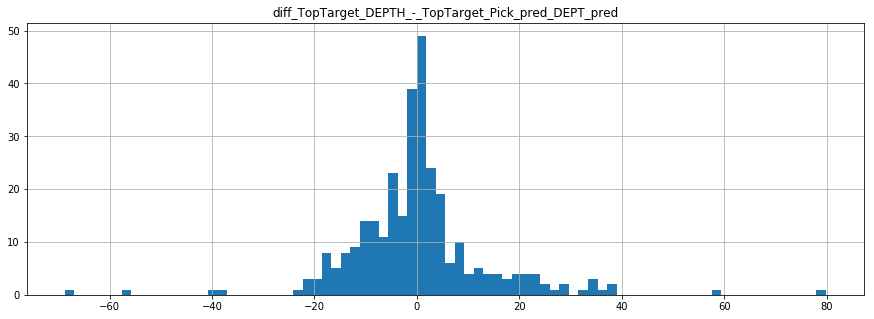

In [56]:
rollToWell_test2 = accuracy_singleTopPerWellPrediction_fromRollingRules(ML1,vs,distClassDF_wRollingCols_testData)

r2_test2,mean_absolute_error_test2,df_calc_pred_Top_Pick_pred_DEPT_pred2_test2 = rollToWell_test2.run_all('TopTarget_Pick_pred_DEPT_pred','TopTarget_DEPTH',keepAllWells="no",dropIfOnlyClasses=[0])

In [57]:
r2_test2

0.9929307653917487

In [58]:
mean_absolute_error_test2

8.543778135048235

In [59]:
rollToWell_test2.precentWellsKept

0.9688473520249221

In [60]:
len(rollToWell_test2.fullUWIsSet)

321

In [61]:
len(rollToWell_test2.fullUWIsSet)*rollToWell_test2.precentWellsKept

311.0

In [63]:
print("number of wells with only zeros predicted that were thrown out")
len(rollToWell_test2.fullUWIsSet) - len(rollToWell_test2.fullUWIsSet)*rollToWell_test2.precentWellsKept

number of wells with only zeros predicted that were thrown out


10.0